In [1]:
import pandas as pd

raw=pd.read_csv("./dist/H28-no-disc.csv", index_col=0)
raw

,id1,text1,id2,text2,id3,text3,id4,text4,id5,text5
index,,,,,,,,,,
1,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-01,医学・医療の歴史的な流れとその意味を概説できる。
2,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-02,臨床倫理や生と死に関わる倫理的問題を概説できる。
3,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-03,ヒポクラテスの誓い、ジュネーブ宣言、医師の職業倫理指針、医師憲章等医療の倫理に関する規範を概...
4,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-02,患者中心の視点,A-01-02-na,なし,A-01-02-na-01,リスボン宣言等に示された患者の基本的権利を説明できる。
5,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-02,患者中心の視点,A-01-02-na,なし,A-01-02-na-02,患者の自己決定権の意義を説明できる。
...,...,...,...,...,...,...,...,...,...,...
2002,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-01,シミュレータを用いて反復練習をすることで、臨床技能を磨く。
2003,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-02,模擬患者の協力を得て、臨床技能（コミュニケーションスキルを含む）や医療者に求められる態度を身...
2004,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-03,シナリオを用いたトレーニングを通して、状況判断、意思決定能力を獲得する。


In [6]:
import spacy
import ginza

nlp = spacy.load("ja_ginza_electra")

text="出血傾向"

doc = nlp(text)
node= ginza.bunsetu_spans(doc)[-1]
node.text
node,node.label_,node.text.replace("。","")

(出血傾向, 'NP', '出血傾向')

In [12]:
import spacy
import ginza

nlp = spacy.load("ja_ginza_electra")

def extract_verb(text:str)->str:
  doc = nlp(text)
  return ginza.bunsetu_spans(doc)

bunsetu_spans=raw["text5"].map(extract_verb)


/opt/conda/lib/python3.9/site-packages/torch/autocast_mode.py:141: UserWarning: User provided device_type of 'cuda', but CUDA is not available. Disabling
  warnings.warn('User provided device_type of \'cuda\', but CUDA is not available. Disabling')


In [18]:
def extract_last_span(bunsetu_spans):
  text=bunsetu_spans[-1].text.replace("。","")
  if(text in ["できる","する","なる"]):
    text=bunsetu_spans[-2].text+text
  return text

raw["last_span"]=bunsetu_spans.map(extract_last_span)
raw["last_span_type"]=bunsetu_spans.map(lambda x:x[-1].label_)


raw.to_csv("./dist/H28_with_last_span.csv",encoding="utf_8_sig")
h28_with_verb=raw[raw["last_span_type"]=="VP"]
h28_with_verb.to_csv("./dist/H28_with_verb.csv",encoding="utf_8_sig")
raw

,id1,text1,id2,text2,id3,text3,id4,text4,id5,text5,last_span,last_span_type
index,,,,,,,,,,,,
1,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-01,医学・医療の歴史的な流れとその意味を概説できる。,概説できる,VP
2,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-02,臨床倫理や生と死に関わる倫理的問題を概説できる。,概説できる,VP
3,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-01,医の倫理と生命倫理,A-01-01-na,なし,A-01-01-na-03,ヒポクラテスの誓い、ジュネーブ宣言、医師の職業倫理指針、医師憲章等医療の倫理に関する規範を概...,概説できる,VP
4,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-02,患者中心の視点,A-01-02-na,なし,A-01-02-na-01,リスボン宣言等に示された患者の基本的権利を説明できる。,説明できる,VP
5,A,医師として求められる基本的な資質・能力,A-01,プロフェッショナリズム,A-01-02,患者中心の視点,A-01-02-na,なし,A-01-02-na-02,患者の自己決定権の意義を説明できる。,説明できる,VP
...,...,...,...,...,...,...,...,...,...,...,...,...
2002,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-01,シミュレータを用いて反復練習をすることで、臨床技能を磨く。,磨く,VP
2003,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-02,模擬患者の協力を得て、臨床技能（コミュニケーションスキルを含む）や医療者に求められる態度を身...,付ける,VP
2004,G,臨床実習,G-04,診療科臨床実習,G-04-04,シミュレーション教育,G-04-04-na,なし,G-04-04-na-03,シナリオを用いたトレーニングを通して、状況判断、意思決定能力を獲得する。,獲得する,VP


In [21]:
verb_count=h28_with_verb.loc[:,["last_span","id1"]].groupby(["last_span"]).count().reset_index().sort_values("id1",ascending=False)
verb_count.columns=["verb","count"]
verb_count["percent"]=verb_count["count"]/verb_count["count"].sum()*100
verb_count.to_csv("./dist/H28_verb.csv",encoding="utf_8_sig",index=False)
verb_count


,verb,count,percent
130,説明できる,872,55.224826
79,概説できる,293,18.556048
25,列挙できる,44,2.786574
48,実施できる,28,1.773274
32,参加する,27,1.709943
...,...,...,...
73,提示できる,1,0.063331
72,提案できる,1,0.063331
71,接することができる,1,0.063331
1,たどることができる,1,0.063331


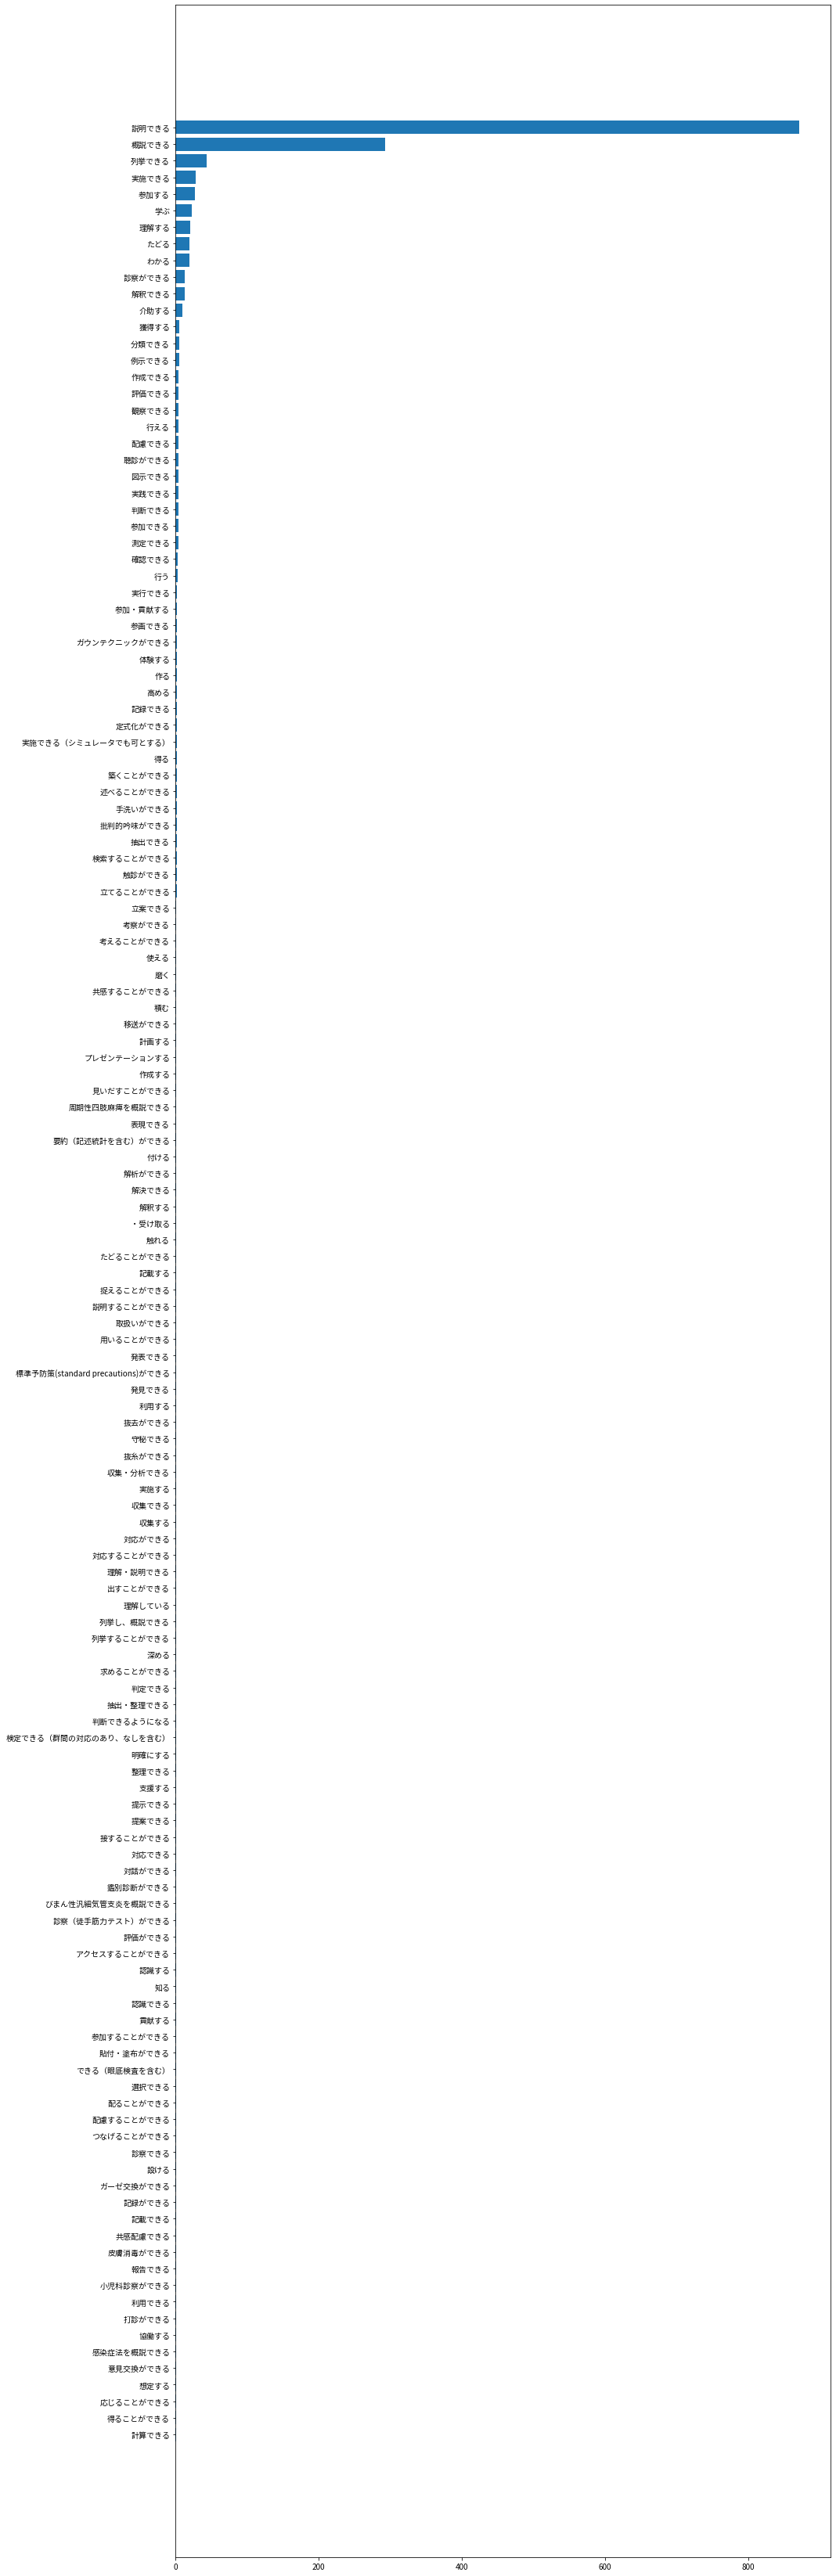

'/home/jovyan/.cache/matplotlib'

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib as mpl

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Noto Sans CJK JP']

verb_data=verb_count.sort_values(["count"])
fig,ax = plt.subplots(figsize=(15,60))
fig.patch.set_facecolor('w') 
ax.barh(verb_data["verb"],verb_data["count"])
plt.show()
fig.savefig("./dist/H28_verbs_ranking.png")
mpl.get_cachedir()
